In [ ]:
# To restart the kernel and clear output, run the following in a code cell:
# import os
# os.kill(os.getpid(), 9)


In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
#/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/train.csv


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/test.csv")

holidays_events = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/holidays_events.csv")
oil = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/oil.csv")
stores =  pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/stores.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/transactions.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


# EDA

## Checking for missing/nan values, & acknowledge about the Dtype of all the datasets.

In [ ]:
L = [train, test, holidays_events, oil, stores, transactions]
for i in range(6):
  print(L[i].info())
  print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------   

In [ ]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

## Processing oil dataset

In [ ]:
oil.rename(columns = {"dcoilwtico": "oil_price"}, inplace = True)

In [ ]:
oil.isna().sum()

date          0
oil_price    43
dtype: int64

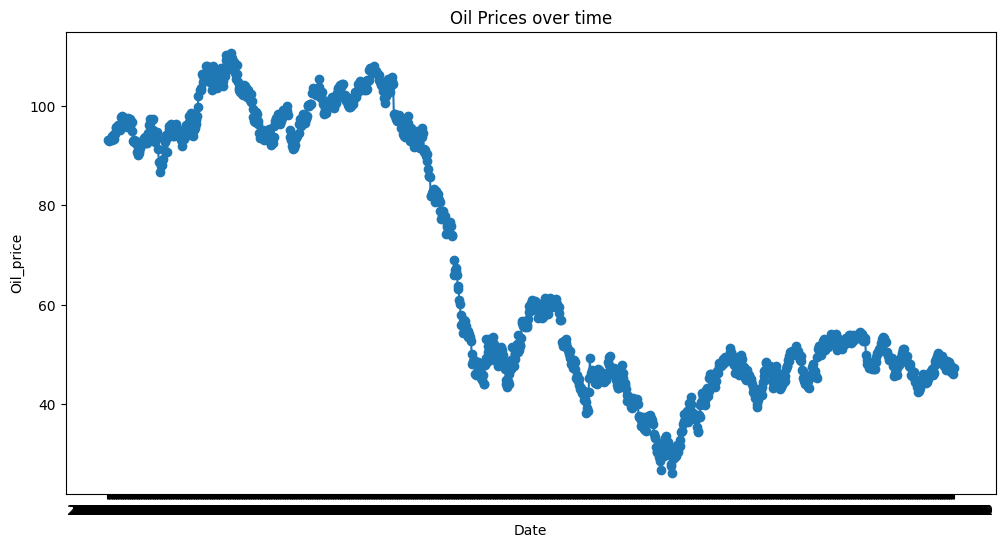

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(oil["date"], oil["oil_price"], marker = 'o', linestyle = '-')
plt.title("Oil Prices over time")
plt.xlabel("Date")
plt.ylabel("Oil_price")
plt.show()

Fillling missing values via linear interpolation

In [ ]:
oil["oil_price"].interpolate(method = 'linear', inplace = True)

In [ ]:
oil.isna().sum()

date         0
oil_price    1
dtype: int64

In [ ]:
oil.iloc[0:5, :]

,date,oil_price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


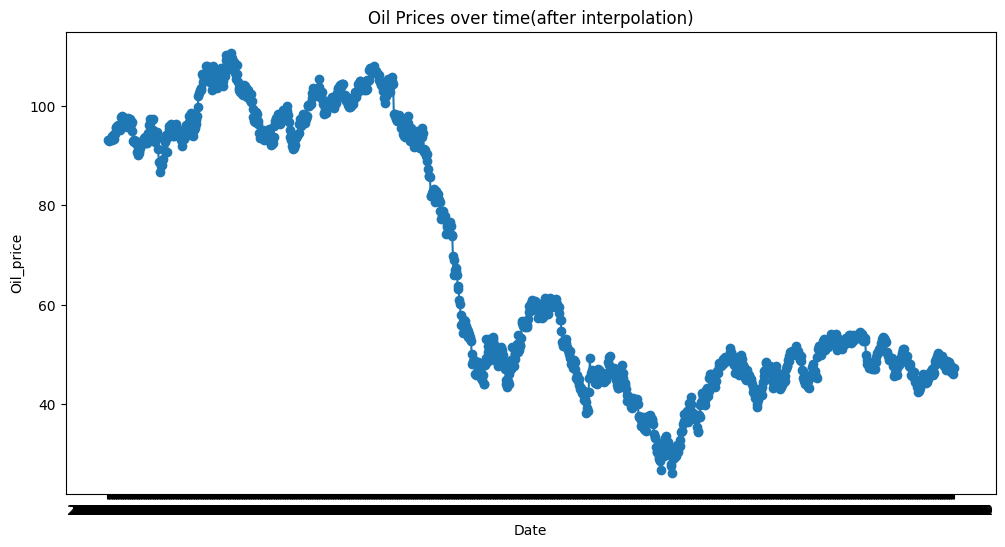

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(oil["date"], oil["oil_price"], marker = 'o', linestyle = '-')
plt.title("Oil Prices over time(after interpolation)")
plt.xlabel("Date")
plt.ylabel("Oil_price")
plt.show()


In [ ]:
oil.at[0,"oil_price"] = oil.at[1,"oil_price"]

In [ ]:
oil["oil_price"]

0       93.14
1       93.14
2       92.97
3       93.12
4       93.20
        ...  
1213    47.65
1214    46.40
1215    46.46
1216    45.96
1217    47.26
Name: oil_price, Length: 1218, dtype: float64

In [ ]:
oil.isna().sum()

date         0
oil_price    0
dtype: int64

In [ ]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1218 non-null   object 
 1   oil_price  1218 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


## Processing with hoildays_event dataset

In [ ]:

holidays_events.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holidays_events[(holidays_events["type"] == 'Transfer') | (holidays_events["transferred"] == True)].head()
#df_holiday[(df_holiday['transferred'] == True) | (df_holiday['type'] == 'Transfer')].head()



,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True



Transformation for the Holiday that is transferred and should be updated to a normal day, Days that have type 'Transfer' will be updated as regular holidays.


In [ ]:

holidays_events.loc[holidays_events['transferred'], 'type'] = 'Normal'
holidays_events.loc[holidays_events['type'] == 'Transfer', 'type'] = 'Holiday'

In [ ]:
holidays_events.head(3)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False


Now the transformations has done, so we can drop the column "transfered".

In [ ]:
holidays_events.drop("transferred", axis = 1, inplace = True)

In [ ]:
holidays_events["type"].unique()

array(['Holiday', 'Normal', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)


Also, since bridge days are added to holidays, they can also be considered holidays.

In [ ]:
holidays_events.loc[holidays_events["type"] == 'Bridge', 'type'] = 'Holiday'

In [ ]:
holidays_events["type"].unique()

array(['Holiday', 'Normal', 'Additional', 'Work Day', 'Event'],
      dtype=object)

In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


 Combining oil, holiday, transactions and store datasets to training dataset

In [ ]:
def combin_df(train, oil, transactions, stores, holidays_events):
  merged_data = pd.merge(train, oil, on = 'date')
  merged_data = pd.merge(merged_data, transactions, on=['store_nbr', 'date'], how = 'left')
  merged_data = pd.merge(merged_data, stores, on = 'store_nbr', how = 'left')
  merged_data = pd.merge(merged_data, holidays_events, on = 'date', how = 'left')


  return merged_data

As of now fill the missing values as 'None'

In [ ]:

merged_data = combin_df(train, oil, transactions, stores, holidays_events)
merged_data.fillna("None", inplace = True)
merged_data.isna().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
oil_price       0
transactions    0
city            0
state           0
type_x          0
cluster         0
type_y          0
locale          0
locale_name     0
description     0
dtype: int64

In [ ]:
oil.head()

,date,oil_price
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


## Turning the date column into a datetime object, so that we can do tranformations more easiy for the datasets:

In [ ]:
# function that takes a df and splits it into day, month, and year
def datetime_split(df):
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df.drop('date', axis=1, inplace=True)

In [ ]:
# holidays_events["date"] = pd.to_datetime(holidays_events.date)
# datetime_split(holidays_events)

In [ ]:
# oil["date"] = pd.to_datetime(oil.date)
# datetime_split(oil)

In [ ]:
transactions.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
# test["date"] = pd.to_datetime(test.date)
# datetime_split(test)

In [ ]:
test.head()


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


## Accounting for payday and the disaster

In [ ]:
train = merged_data
train["date"] = pd.to_datetime(train.date)
train['last_day_of_month'] = train['date'].dt.is_month_end.astype(int)
datetime_split(train)

# train['day'] = train['date'].dt.day
# train['month'] = train['date'].dt.month
# train['year'] = train['date'].dt.year
# train.drop('date', axis=1, inplace=True)

Adding a new column "payday", which reflects the binary value 1, if the date on which salary is paid, i.e on 15th & the last day of the month, otherwise 0.

In [ ]:
train['payday'] = ((train['last_day_of_month'] == 1) | (train['day'] == 15)).astype(int)
train[train['payday'] == 1].head(25)

,id,store_nbr,family,sales,onpromotion,oil_price,transactions,city,state,type_x,cluster,type_y,locale,locale_name,description,last_day_of_month,day,month,year,payday
17820,24948,1,AUTOMOTIVE,1.000,0,93.26,1680.0,Quito,Pichincha,D,13,None,None,None,None,0,15,1,2013,1
17821,24949,1,BABY CARE,0.000,0,93.26,1680.0,Quito,Pichincha,D,13,None,None,None,None,0,15,1,2013,1
17822,24950,1,BEAUTY,0.000,0,93.26,1680.0,Quito,Pichincha,D,13,None,None,None,None,0,15,1,2013,1
17823,24951,1,BEVERAGES,1149.000,0,93.26,1680.0,Quito,Pichincha,D,13,None,None,None,None,0,15,1,2013,1
17824,24952,1,BOOKS,0.000,0,93.26,1680.0,Quito,Pichincha,D,13,None,None,None,None,0,15,1,2013,1
17825,24953,1,BREAD/BAKERY,285.612,0,93.26,1680.0,Quito,Pichincha,D,13,None,None,None,None,0,15,1,2013,1
17826,24954,1,CELEBRATION,0.000,0,93.26,1680.0,Quito,Pichincha,D,13,None,None,None,None,0,15,1,2013,1
17827,24955,1,CLEANING,686.000,0,93.26,1680.0,Quito,Pichincha,D,13,None,None,None,None,0,15,1,2013,1
17828,24956,1,DAIRY,357.000,0,93.26,1680.0,Quito,Pichincha,D,13,None,None,None,None,0,15,1,2013,1
17829,24957,1,DELI,100.801,0,93.26,1680.0,Quito,Pichincha,D,13,None,None,None,None,0,15,1,2013,1


Now, due to 7.8 earthquake struck Ecuador on April 16, 2016, we have to drop the disaster date from the training data, so the ambiguous values will not affect the model.

In [ ]:
# dropping the date of disaster and the month after it
indexes_to_drop = train[(train['year'] == 2016) & ((train['month'] == 4) | (train['month'] == 5))].index

# use boolean indexing to drop rows
train = train.drop(indexes_to_drop)

# old index values dropped
train = train.reset_index(drop=True)

In [ ]:
#check for dropping values
train[(train['year'] == 2016) & ((train['month'] == 4) | (train['month'] == 5))]

,id,store_nbr,family,sales,onpromotion,oil_price,transactions,city,state,type_x,cluster,type_y,locale,locale_name,description,last_day_of_month,day,month,year,payday


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175822 entries, 0 to 2175821
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   store_nbr          int64  
 2   family             object 
 3   sales              float64
 4   onpromotion        int64  
 5   oil_price          float64
 6   transactions       object 
 7   city               object 
 8   state              object 
 9   type_x             object 
 10  cluster            int64  
 11  type_y             object 
 12  locale             object 
 13  locale_name        object 
 14  description        object 
 15  last_day_of_month  int64  
 16  day                int64  
 17  month              int64  
 18  year               int64  
 19  payday             int64  
dtypes: float64(2), int64(9), object(9)
memory usage: 413.1+ MB


In [ ]:
train.info()
#merged_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095632 entries, 0 to 2095631
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   store_nbr          int64  
 2   family             object 
 3   sales              float64
 4   onpromotion        int64  
 5   oil_price          float64
 6   transactions       object 
 7   city               object 
 8   state              object 
 9   type_x             object 
 10  cluster            int64  
 11  type_y             object 
 12  locale             object 
 13  locale_name        object 
 14  description        object 
 15  last_day_of_month  int64  
 16  day                int64  
 17  month              int64  
 18  year               int64  
 19  payday             int64  
dtypes: float64(2), int64(9), object(9)
memory usage: 319.8+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
train[(train['year'] == 2016) & ((train['month'] == 4) | (train['month'] == 5))]

,id,store_nbr,family,sales,onpromotion,oil_price,transactions,city,state,type_x,cluster,type_y,locale,locale_name,description,last_day_of_month,day,month,year,payday


In [ ]:
# import pandas as pd

# # Assuming 'train_transformed' is your transformed DataFrame
# # If not, you should load or recreate it before running this code
# train_transformed = train
# # Step 1: Recreate the 'date' column
# train_transformed['date'] = pd.to_datetime(train_transformed['year'].astype(str) + '-' +
#                                              train_transformed['month'].astype(str) + '-' +
#                                              train_transformed['day'].astype(str))

# # Step 2: Drop the additional column
# train_transformed.drop(['last_day_of_month', 'day', 'month', 'year'], axis=1, inplace=True)

# # Step 3: Reset the index
# train_transformed = train_transformed.reset_index(drop=True)


As before we have add the new column "payday" based on the last_day_of_month & 15th day of the month, so we can drop the "last_day_of_month" column.

In [ ]:
train.drop("last_day_of_month", axis =1, inplace = True)

## Merging all the datasets for the testing_data

In [ ]:
# test = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/test.csv")
# oil = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/oil.csv")
# holidays_events = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/holidays_events.csv")
def combin_df(test, oil, holidays_events, transactions, stores):
  merged_data1 = pd.merge(test, oil, on = 'date')
  merged_data1 = pd.merge(merged_data1, holidays_events, on = 'date', how = 'left')
  merged_data1.fillna("None", inplace = True)
  merged_data1 = pd.merge(merged_data1, stores, on = 'store_nbr', how = 'left')
  merged_data1 = pd.merge(merged_data1, transactions, on=['store_nbr', 'date'], how = 'left')
  return merged_data1
merged_data1 = combin_df(test, oil, holidays_events, transactions, stores)
merged_data1.isna().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
oil_price           0
type_x              0
locale              0
locale_name         0
description         0
city                0
state               0
type_y              0
cluster             0
transactions    21384
dtype: int64

In [ ]:
merged_data1.fillna("None", inplace = True)
merged_data1.isna().sum()

id              0
date            0
store_nbr       0
family          0
onpromotion     0
oil_price       0
type_x          0
locale          0
locale_name     0
description     0
city            0
state           0
type_y          0
cluster         0
transactions    0
dtype: int64

In [ ]:
test = merged_data1
test["date"] = pd.to_datetime(test.date)
test['last_day_of_month'] = test['date'].dt.is_month_end.astype(int)
datetime_split(test)


In [ ]:
test['payday'] = ((test['last_day_of_month'] == 1) | (test['day'] == 15)).astype(int)
test[test['payday'] == 1].head(25)

,id,store_nbr,family,onpromotion,oil_price,type_x,locale,locale_name,description,city,state,type_y,cluster,transactions,last_day_of_month,day,month,year,payday
19602,3027618,1,AUTOMOTIVE,0,47.26,None,None,None,None,Quito,Pichincha,D,13,None,1,31,8,2017,1
19603,3027619,1,BABY CARE,0,47.26,None,None,None,None,Quito,Pichincha,D,13,None,1,31,8,2017,1
19604,3027620,1,BEAUTY,1,47.26,None,None,None,None,Quito,Pichincha,D,13,None,1,31,8,2017,1
19605,3027621,1,BEVERAGES,33,47.26,None,None,None,None,Quito,Pichincha,D,13,None,1,31,8,2017,1
19606,3027622,1,BOOKS,0,47.26,None,None,None,None,Quito,Pichincha,D,13,None,1,31,8,2017,1
19607,3027623,1,BREAD/BAKERY,4,47.26,None,None,None,None,Quito,Pichincha,D,13,None,1,31,8,2017,1
19608,3027624,1,CELEBRATION,0,47.26,None,None,None,None,Quito,Pichincha,D,13,None,1,31,8,2017,1
19609,3027625,1,CLEANING,12,47.26,None,None,None,None,Quito,Pichincha,D,13,None,1,31,8,2017,1
19610,3027626,1,DAIRY,11,47.26,None,None,None,None,Quito,Pichincha,D,13,None,1,31,8,2017,1
19611,3027627,1,DELI,5,47.26,None,None,None,None,Quito,Pichincha,D,13,None,1,31,8,2017,1


In [ ]:
test.drop("last_day_of_month", axis =1, inplace = True)

In [ ]:
# def combin_df(train_transformed, oil, holidays_events, stores):
#   merged_data = pd.merge(train_transformed, oil, on = 'date')
#   merged_data = pd.merge(merged_data, holidays_events, on = 'date', how = 'left')
#   merged_data.fillna("None", inplace = True)
#   merged_data = pd.merge(merged_data, stores, on = 'store_nbr', how = 'left')
#   return merged_data
# merged_data2 = combin_df(train_transformed, oil, holidays_events, stores)
# merged_data2.isna().sum()

# Feature selection

In [ ]:
#training data
train.info()
train.head(10)
#train = train.drop("id", axis =1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095632 entries, 0 to 2095631
Data columns (total 19 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   oil_price     float64
 6   transactions  object 
 7   city          object 
 8   state         object 
 9   type_x        object 
 10  cluster       int64  
 11  type_y        object 
 12  locale        object 
 13  locale_name   object 
 14  description   object 
 15  day           int64  
 16  month         int64  
 17  year          int64  
 18  payday        int64  
dtypes: float64(2), int64(8), object(9)
memory usage: 303.8+ MB


,id,store_nbr,family,sales,onpromotion,oil_price,transactions,city,state,type_x,cluster,type_y,locale,locale_name,description,day,month,year,payday
0,0,1,AUTOMOTIVE,0.0,0,93.14,None,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,1,1,2013,0
1,1,1,BABY CARE,0.0,0,93.14,None,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,1,1,2013,0
2,2,1,BEAUTY,0.0,0,93.14,None,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,1,1,2013,0
3,3,1,BEVERAGES,0.0,0,93.14,None,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,1,1,2013,0
4,4,1,BOOKS,0.0,0,93.14,None,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,1,1,2013,0
5,5,1,BREAD/BAKERY,0.0,0,93.14,None,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,1,1,2013,0
6,6,1,CELEBRATION,0.0,0,93.14,None,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,1,1,2013,0
7,7,1,CLEANING,0.0,0,93.14,None,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,1,1,2013,0
8,8,1,DAIRY,0.0,0,93.14,None,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,1,1,2013,0
9,9,1,DELI,0.0,0,93.14,None,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,1,1,2013,0


In [ ]:

#testing data
test.info()
test.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21384 entries, 0 to 21383
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21384 non-null  int64  
 1   store_nbr     21384 non-null  int64  
 2   family        21384 non-null  object 
 3   onpromotion   21384 non-null  int64  
 4   oil_price     21384 non-null  float64
 5   type_x        21384 non-null  object 
 6   locale        21384 non-null  object 
 7   locale_name   21384 non-null  object 
 8   description   21384 non-null  object 
 9   city          21384 non-null  object 
 10  state         21384 non-null  object 
 11  type_y        21384 non-null  object 
 12  cluster       21384 non-null  int64  
 13  transactions  21384 non-null  object 
 14  day           21384 non-null  int64  
 15  month         21384 non-null  int64  
 16  year          21384 non-null  int64  
 17  payday        21384 non-null  int64  
dtypes: float64(1), int64(8), o

,id,store_nbr,family,onpromotion,oil_price,type_x,locale,locale_name,description,city,state,type_y,cluster,transactions,day,month,year,payday
0,3000888,1,AUTOMOTIVE,0,46.8,None,None,None,None,Quito,Pichincha,D,13,None,16,8,2017,0
1,3000889,1,BABY CARE,0,46.8,None,None,None,None,Quito,Pichincha,D,13,None,16,8,2017,0
2,3000890,1,BEAUTY,2,46.8,None,None,None,None,Quito,Pichincha,D,13,None,16,8,2017,0
3,3000891,1,BEVERAGES,20,46.8,None,None,None,None,Quito,Pichincha,D,13,None,16,8,2017,0
4,3000892,1,BOOKS,0,46.8,None,None,None,None,Quito,Pichincha,D,13,None,16,8,2017,0
5,3000893,1,BREAD/BAKERY,12,46.8,None,None,None,None,Quito,Pichincha,D,13,None,16,8,2017,0
6,3000894,1,CELEBRATION,0,46.8,None,None,None,None,Quito,Pichincha,D,13,None,16,8,2017,0
7,3000895,1,CLEANING,25,46.8,None,None,None,None,Quito,Pichincha,D,13,None,16,8,2017,0
8,3000896,1,DAIRY,45,46.8,None,None,None,None,Quito,Pichincha,D,13,None,16,8,2017,0
9,3000897,1,DELI,18,46.8,None,None,None,None,Quito,Pichincha,D,13,None,16,8,2017,0


In [ ]:
#columns to drop
#compute maximum  null values, or none values in a column/row.
#label encoder transform to numerical values
#Compute correlation with target column, i.e sales
# # random forest top k important features



As we have replaced the missing values as 'None', while merging datasets, now for the object Dtype columns the values behave as an 'str', while for the nonobject columns like integer or float DType columns the values also behave as an 'str', so for the later one we have to replace it with the median of the corresponding columns, & for the object Dtype columns we are replacing with 'np.nan':

In [ ]:
# Convert columns to numeric (ignoring errors to handle 'None')
df = train


from sklearn.impute import SimpleImputer# Replace "None" values with NaN using np.where
# Replace "None" values with NaN using np.where
df = df.apply(lambda x: np.where(x == 'None', np.nan, x))

# # Convert columns to numeric
# df = df.apply(pd.to_numeric, errors='coerce')

# Iterate over columns
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        # Replace missing values with the median of the column
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)


Applying label_encoder to object Dtype columns, to transform the categorical values to numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select columns with object dtype
categorical_columns = df.select_dtypes(include=['object']).columns
df.replace('None', np.nan, inplace=True)
# Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now, the categorical columns in your DataFrame are encoded with numerical labels


In [ ]:

# Check if any values are 'None' in any columns
any_none_values = df.applymap(lambda x: x == 'np.nan').any()

# Print columns with 'None' values
columns_with_none = any_none_values[any_none_values].index.tolist()
print("Columns with 'None' values:", columns_with_none)

Columns with 'None' values: []


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index([], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095632 entries, 0 to 2095631
Data columns (total 19 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            float64
 1   store_nbr     float64
 2   family        float64
 3   sales         float64
 4   onpromotion   float64
 5   oil_price     float64
 6   transactions  float64
 7   city          float64
 8   state         float64
 9   type_x        float64
 10  cluster       float64
 11  type_y        float64
 12  locale        float64
 13  locale_name   float64
 14  description   float64
 15  day           float64
 16  month         float64
 17  year          float64
 18  payday        float64
dtypes: float64(19)
memory usage: 303.8 MB


In [ ]:
df["type_x"].unique()


array([3, 2, 1, 4, 0])

Computing correlations between the columns & the target column i.e sales, to reduce the number of less relevant columns.

In [ ]:
import pandas as pd
import numpy as np
train = df
# Assuming 'train' is your DataFrame
X = train.drop(["sales", "id"], axis=1)
y = train['sales']

# Calculate correlations using Pandas corr()
correlations = X.corrwith(y, numeric_only=True)

# Filter features with correlations in the range (-1 to -0.00001)
strong_negative_correlations = [(feature, correlation)
                                for feature, correlation in correlations.items()
                                if -1 < correlation < 0]

# Filter features with correlations in the range (0.0001 to 1)
strong_positive_correlations = [(feature, correlation)
                                for feature, correlation in correlations.items()
                                if 0 < correlation < 1]

# Print the result
print("Features with strong negative correlations:")
for feature, correlation in strong_negative_correlations:
    print(f"{feature}: {correlation:.2f}")

print("\nFeatures with strong positive correlations:")
for feature, correlation in strong_positive_correlations:
    print(f"{feature}: {correlation:.2f}")


Features with strong negative correlations:
family: -0.11
oil_price: -0.08
type_x: -0.09
type_y: -0.02
locale: -0.02
locale_name: -0.02
description: -0.01
day: -0.01

Features with strong positive correlations:
store_nbr: 0.03
onpromotion: 0.46
transactions: 0.07
city: 0.05
state: 0.07
cluster: 0.04
month: 0.03
year: 0.09
payday: 0.00


computing for seaborn correlation matrix.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame and you've defined X and y
X = train.drop(["sales", "id"], axis=1)
y = train['sales']

# Combine X and y into a single DataFrame for visualization
df_combined = pd.concat([X, y], axis=1)

# Create a pairplot
sns.pairplot(df_combined)
plt.show()
# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


For Final Training, extracting features based on the correlation values.

In [ ]:
features = ["onpromotion", "year", "transactions", "state", "city", "cluster", "family", "type_x", "oil_price", "type_y", "locale", "locale_name"]
#write updated features
# For training data
X = df[features]
y = df['sales']

# For test data
# X_test_data = merged_data1[Features]


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095632 entries, 0 to 2095631
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   onpromotion   float64
 1   year          float64
 2   transactions  int64  
 3   state         int64  
 4   city          int64  
 5   cluster       float64
 6   family        int64  
 7   type_x        int64  
 8   oil_price     float64
 9   type_y        int64  
 10  locale        int64  
 11  locale_name   int64  
dtypes: float64(4), int64(8)
memory usage: 191.9 MB


Saving the X & y dataset for future model training

In [ ]:
X.to_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/train_X.csv", index = False)

In [ ]:
y.to_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/train_y.csv", index = False)

## Transformation for test_Data.

In [ ]:
# Convert columns to numeric (ignoring errors to handle 'None')
df = test


from sklearn.impute import SimpleImputer# Replace "None" values with NaN using np.where
# Replace "None" values with NaN using np.where
df = df.apply(lambda x: np.where(x == 'None', np.nan, x))

# # Convert columns to numeric
# df = df.apply(pd.to_numeric, errors='coerce')

# Iterate over columns
for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        # Replace missing values with the median of the column
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select columns with object dtype
categorical_columns = df.select_dtypes(include=['object']).columns
df.replace('None', np.nan, inplace=True)
# Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now, the categorical columns in your DataFrame are encoded with numerical labels


In [ ]:
df["type_y"].unique()


array([3, 2, 1, 4, 0])

In [ ]:
features = ["onpromotion", "year", "transactions", "state", "city", "cluster", "family", "type_x", "oil_price", "type_y", "locale", "locale_name"]
X_test_Data  = df[features]

In [ ]:
X_test_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21384 entries, 0 to 21383
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   onpromotion   21384 non-null  float64
 1   year          21384 non-null  float64
 2   transactions  21384 non-null  int64  
 3   state         21384 non-null  int64  
 4   city          21384 non-null  int64  
 5   cluster       21384 non-null  float64
 6   family        21384 non-null  int64  
 7   type_x        21384 non-null  int64  
 8   oil_price     21384 non-null  float64
 9   type_y        21384 non-null  int64  
 10  locale        21384 non-null  int64  
 11  locale_name   21384 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 2.1 MB


Saving the test_Data for future model evaluation

In [ ]:
X_test_Data.to_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/test_Data.csv", index = False)

# Importing merged train dataset &  splitting it.

In [1]:
import pandas as pd
X = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/train_X.csv")
y = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/train_y.csv")

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095632 entries, 0 to 2095631
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   onpromotion   float64
 1   year          float64
 2   transactions  int64  
 3   state         int64  
 4   city          int64  
 5   cluster       float64
 6   family        int64  
 7   type_x        int64  
 8   oil_price     float64
 9   type_y        int64  
 10  locale        int64  
 11  locale_name   int64  
dtypes: float64(4), int64(8)
memory usage: 191.9 MB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095632 entries, 0 to 2095631
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   sales   float64
dtypes: float64(1)
memory usage: 16.0 MB


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466942 entries, 1875027 to 121958
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   onpromotion   1466942 non-null  float64
 1   year          1466942 non-null  float64
 2   transactions  1466942 non-null  int64  
 3   state         1466942 non-null  int64  
 4   city          1466942 non-null  int64  
 5   cluster       1466942 non-null  float64
 6   family        1466942 non-null  int64  
 7   type_x        1466942 non-null  int64  
 8   oil_price     1466942 non-null  float64
 9   type_y        1466942 non-null  int64  
 10  locale        1466942 non-null  int64  
 11  locale_name   1466942 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 145.5 MB


# Model Training

Linear Regression fitting

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
# Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model on the validation set
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (Validation): {rmse}")

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error (Test): {rmse_test}")

r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f"R-squared Score (Validation): {r2_val}")
print(f"R-squared Score (Test): {r2_test}")


Root Mean Squared Error (Validation): 850.25974533775
Root Mean Squared Error (Test): 856.7316248205387
R-squared Score (Validation): 0.22419549277160533
R-squared Score (Test): 0.22728088645178723


Lasso/ Ridge Regression.

In [ ]:

# Lasso Regression model
lasso_model = Lasso(alpha=0.3)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred_lasso = lasso_model.predict(X_val)

# Evaluate the Lasso model on the validation set
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print(f"Lasso Regression - Root Mean Squared Error (Validation): {rmse_lasso}")

# Ridge Regression model
ridge_model = Ridge(alpha=3.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)

# Predictions on the validation set
y_val_pred_ridge = ridge_model.predict(X_val)

# Evaluate the Ridge model on the validation set
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print(f"Ridge Regression - Root Mean Squared Error (Validation): {rmse_ridge}")

# Predictions on the test set for both Lasso and Ridge models
y_test_pred_lasso = lasso_model.predict(X_test)
y_test_pred_ridge = ridge_model.predict(X_test)

# Evaluate the models on the test set
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
print(f"Lasso Regression - Root Mean Squared Error (Test): {rmse_test_lasso}")

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
print(f"Ridge Regression - Root Mean Squared Error (Test): {rmse_test_ridge}")

r2_val = r2_score(y_val, y_val_pred_lasso)
r2_test = r2_score(y_test, y_test_pred_lasso)
print(f"Lasso Regression - R-squared Score (Validation): {r2_val}")
print(f"Lasso Regression - R-squared Score (Test): {r2_test}")


r2_val = r2_score(y_val, y_val_pred_ridge)
r2_test = r2_score(y_test, y_test_pred_ridge)
print(f"Ridge Regression - R-squared Score (Validation): {r2_val}")
print(f"Ridge Regression - R-squared Score (Test): {r2_test}")


Lasso Regression - Root Mean Squared Error (Validation): 850.2625716875068
Ridge Regression - Root Mean Squared Error (Validation): 850.2597455006385
Lasso Regression - Root Mean Squared Error (Test): 856.7245000537932
Ridge Regression - Root Mean Squared Error (Test): 856.7316230734219
Lasso Regression - R-squared Score (Validation): 0.22419033505706742
Lasso Regression - R-squared Score (Test): 0.22729373859916246
Ridge Regression - R-squared Score (Validation): 0.22419549247435588
Ridge Regression - R-squared Score (Test): 0.22728088960337056


Random Forest Regressor (222.58)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Assuming you have already split your data into training, validation, and test sets

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Flatten y_train
y_train_flat = y_train.values.ravel()

# Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)  # You can adjust the number of estimators
rf_model.fit(X_train, y_train_flat)

# Predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)



In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Evaluate the Random Forest model on the validation set
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Random Forest Regression - Root Mean Squared Error (Validation): {rmse_rf}")

# Predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model on the test set
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
print(f"Random Forest Regression - Root Mean Squared Error (Test): {rmse_test_rf}")
from sklearn.metrics import r2_score

r2_val = r2_score(y_val, y_val_pred_rf)
r2_test = r2_score(y_test, y_test_pred_rf)
print(f"R-squared Score (Validation): {r2_val}")
print(f"R-squared Score (Test): {r2_test}")


Random Forest Regression - Root Mean Squared Error (Validation): 272.1614860259019
Random Forest Regression - Root Mean Squared Error (Test): 299.2543537629572
R-squared Score (Validation): 0.9205118486312898
R-squared Score (Test): 0.9057214242636479


In [7]:
test_Data = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/test_Data.csv")

y_test_Data_pred = rf_model.predict(test_Data)
subm = pd.read_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/sample_submission.csv")


In [8]:
y_test_Data_pred.shape

(21384,)

In [9]:
subm.shape

(28512, 2)

In [10]:
28512-21384

7128

In [14]:
subm_new = subm.iloc[:-7128]

In [15]:
subm_new.shape

(21384, 2)

In [16]:
subm_new["sales"] = y_test_Data_pred
subm_new.to_csv("/content/drive/MyDrive/Kaggle_1/store-sales-time-series-forecasting/rf_submission.csv")

<ipython-input-16-70cd1896fe65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subm_new["sales"] = y_test_Data_pred


In [ ]:
from sklearn.svm import SVR
# Initialize Support Vector Regressor model
#svr_model = SVR(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter
svr_model = SVR(kernel='rbf', C=1.0, gamma='scale')  # Adjust C and gamma

# Train the model on the training set
svr_model.fit(X_train, y_train.values.ravel())

# Predictions on the validation set
y_val_pred_svr = svr_model.predict(X_val)

# Evaluate the SVR model on the validation set
mse_svr_val = mean_squared_error(y_val, y_val_pred_svr)
rmse_svr_val = np.sqrt(mse_svr_val)
print(f"SVR - Root Mean Squared Error (Validation): {rmse_svr_val}")

# Predictions on the test set
y_test_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model on the test set
mse_svr_test = mean_squared_error(y_test, y_test_pred_svr)
rmse_svr_test = np.sqrt(mse_svr_test)
print(f"SVR - Root Mean Squared Error (Test): {rmse_svr_test}")


r2_val = r2_score(y_val, y_val_pred_svr)
r2_test = r2_score(y_test, y_test_pred_svr)
print(f"R-squared Score (Validation): {r2_val}")
print(f"R-squared Score (Test): {r2_test}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
   # Adjust C, degree, and coef0
from sklearn.svm import SVR
# Initialize Support Vector Regressor model
#svr_model = SVR(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter

svr_poly = SVR(kernel='poly', C=1.0, degree=3, coef0=0.0)  # Adjust C and gamma
svr_model = svr_poly
# Train the model on the training set
svr_model.fit(X_train, y_train.values.ravel())

# Predictions on the validation set
y_val_pred_svr = svr_model.predict(X_val)

# Evaluate the SVR model on the validation set
mse_svr_val = mean_squared_error(y_val, y_val_pred_svr)
rmse_svr_val = np.sqrt(mse_svr_val)
print(f"SVR - Root Mean Squared Error (Validation): {rmse_svr_val}")

# Predictions on the test set
y_test_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model on the test set
mse_svr_test = mean_squared_error(y_test, y_test_pred_svr)
rmse_svr_test = np.sqrt(mse_svr_test)
print(f"SVR - Root Mean Squared Error (Test): {rmse_svr_test}")


r2_val = r2_score(y_val, y_val_pred_svr)
r2_test = r2_score(y_test, y_test_pred_svr)
print(f"R-squared Score (Validation): {r2_val}")
print(f"R-squared Score (Test): {r2_test}")


In [ ]:
   # Adjust C, degree, and coef0
from sklearn.svm import SVR
# Initialize Support Vector Regressor model
#svr_model = SVR(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter

svr_sigmoid = SVR(kernel='sigmoid', C=1.0, coef0=0.0)  # Adjust C and coef0
svr_model = svr_sigmoid
# Train the model on the training set
svr_model.fit(X_train, y_train.values.ravel())

# Predictions on the validation set
y_val_pred_svr = svr_model.predict(X_val)

# Evaluate the SVR model on the validation set
mse_svr_val = mean_squared_error(y_val, y_val_pred_svr)
rmse_svr_val = np.sqrt(mse_svr_val)
print(f"SVR - Root Mean Squared Error (Validation): {rmse_svr_val}")

# Predictions on the test set
y_test_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model on the test set
mse_svr_test = mean_squared_error(y_test, y_test_pred_svr)
rmse_svr_test = np.sqrt(mse_svr_test)
print(f"SVR - Root Mean Squared Error (Test): {rmse_svr_test}")


r2_val = r2_score(y_val, y_val_pred_svr)
r2_test = r2_score(y_test, y_test_pred_svr)
print(f"R-squared Score (Validation): {r2_val}")
print(f"R-squared Score (Test): {r2_test}")


In [ ]:
# Adjust C, degree, and coef0
from sklearn.svm import SVR
# Initialize Support Vector Regressor model
#svr_model = SVR(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter

svr_linear = SVR(kernel='linear')
svr_model = svr_linear
# Train the model on the training set
svr_model.fit(X_train, y_train.values.ravel())

# Predictions on the validation set
y_val_pred_svr = svr_model.predict(X_val)

# Evaluate the SVR model on the validation set
mse_svr_val = mean_squared_error(y_val, y_val_pred_svr)
rmse_svr_val = np.sqrt(mse_svr_val)
print(f"SVR - Root Mean Squared Error (Validation): {rmse_svr_val}")

# Predictions on the test set
y_test_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model on the test set
mse_svr_test = mean_squared_error(y_test, y_test_pred_svr)
rmse_svr_test = np.sqrt(mse_svr_test)
print(f"SVR - Root Mean Squared Error (Test): {rmse_svr_test}")


r2_val = r2_score(y_val, y_val_pred_svr)
r2_test = r2_score(y_test, y_test_pred_svr)
print(f"R-squared Score (Validation): {r2_val}")
print(f"R-squared Score (Test): {r2_test}")
